In [7]:
# %conda install -c conda-forge tabulate

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [9]:
from pathlib import Path

# Get the current directory of the notebook
current_dir = Path.cwd()

print(current_dir)

/Users/phongporter/Documents/GITHUB/jeopardy_clue_dataset/analysis


In [16]:
# Redirect to the relative path to parent directory
PATH = '/Users/phongporter/Documents/GITHUB/jeopardy_clue_dataset'
# os.chdir(current_dir.parent)

In [17]:
season_1_df_category =pd.read_csv(PATH + '/seasons/season1.tsv',sep='\t')

In [18]:
season_1_df_category

,round,clue_value,daily_double_value,category,comments,answer,question,air_date,notes
0,1,100,0,LAKES & RIVERS,NaN,River mentioned most often in the Bible,the Jordan,1984-09-10,NaN
1,1,200,0,LAKES & RIVERS,NaN,Scottish word for lake,loch,1984-09-10,NaN
2,1,400,0,LAKES & RIVERS,NaN,American river only 33 miles shorter than the ...,the Missouri,1984-09-10,NaN
3,1,500,0,LAKES & RIVERS,NaN,"World's largest lake, nearly 5 times as big as...",the Caspian Sea,1984-09-10,NaN
4,1,100,0,INVENTIONS,NaN,Marconi's wonderful wireless,a radio,1984-09-10,NaN
...,...,...,...,...,...,...,...,...,...
8247,2,400,0,WARS,NaN,"Dutch for ""farmer"", the British defeated them ...",the Boers,1985-06-05,NaN
8248,2,600,600,WARS,NaN,War in which this song 1st became popular in A...,the Civil War,1985-06-05,NaN
8249,2,800,0,WARS,NaN,In naval victory over the Turks at Lepanto in ...,Cervantes,1985-06-05,NaN
8250,2,1000,0,WARS,NaN,16th c. war for control of France between Henr...,the War of the Three Henrys,1985-06-05,NaN


In [19]:
# Group by the column and get the size of each group
grouped_counts = season_1_df_category.groupby('category').size().reset_index(name='count')

# Print the counts
print(grouped_counts)

# Get the total number of unique values
num_unique_values = len(grouped_counts)
print(f"\nThere are {num_unique_values} unique values in the column.")

            category  count
0      $ IN THE NEWS      3
1    10-LETTER WORDS      5
2    11-LETTER WORDS      5
3    12-LETTER WORDS     15
4    13-LETTER WORDS      5
..               ...    ...
810     \'40s TRIVIA      4
811        \'50'S TV      5
812         \'50s TV      5
813      \'60s SONGS     10
814     \'60s TRIVIA      5

[815 rows x 2 columns]

There are 815 unique values in the column.


In [20]:
# cwd = os.getcwd()
# print(cwd)

In [21]:
def create_directory(directory_path):
  """Creates a new directory if it doesn't already exist.

  Args:
    directory_path: The path to the directory to create.
  """
  if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    print(f"Directory '{directory_path}' created successfully.")
  else:
    print(f"Directory '{directory_path}' already exists.")

In [22]:
#Export the csv file into a new folder for further exploring

PATH = './jeopardy_clue_dataset/analysis/data/season/1/category'

create_directory(PATH)

grouped_counts.to_csv(PATH + '/count_unique.csv', index=False)

Directory './jeopardy_clue_dataset/analysis/data/season/1/category' created successfully.


In [23]:
# Sort the DataFrame by 'count' in descending order
df_sorted = grouped_counts.sort_values(by='count', ascending=False)

# Display the sorted table
df_sorted

,category,count
546,SPORTS,155
671,TRIVIA,113
511,SCIENCE,103
586,TELEVISION,89
64,ANIMALS,80
...,...,...
608,THE AUTOMOBILE,1
168,CONTESTS,1
445,PARKS,1
121,BRITISH MONARCHS,1


Key improvements in this solution:

1. Dynamic figure height based on the number of categories
2. Reduced font size for y-axis labels (category names)
3. Added gridlines to make value reading easier
4. Adjusted margins to maximize space usage
5. Added optional code to show only every nth label if still too dense

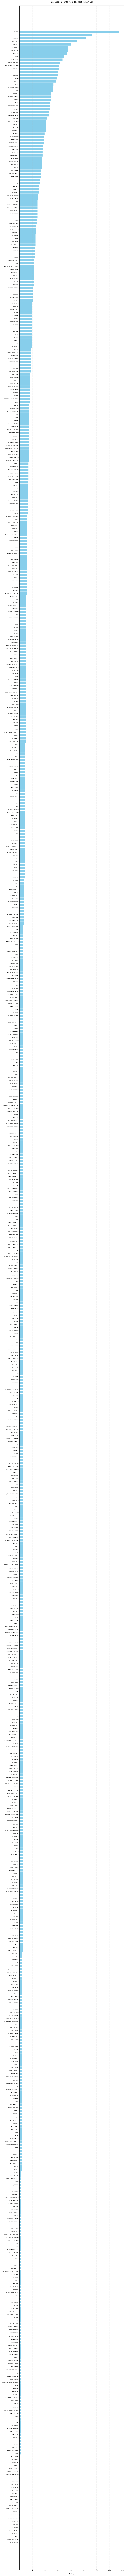

In [24]:
# Horizontal Bar Chart

# Create figure with adjusted dimensions
plt.figure(figsize=(12, max(30, len(df_sorted) * 0.3)))  # Dynamic height based on number of categories

# Create the horizontal bar chart
plt.barh(df_sorted['category'], df_sorted['count'], color='skyblue')

# Customize the plot
plt.xlabel('Count', fontsize=12, labelpad=10)
plt.title('Category Counts from Highest to Lowest', fontsize=14, pad=20)

# Fix the y-axis labels
plt.tick_params(axis='y', labelsize=8)  # Reduce font size of y labels
plt.gca().invert_yaxis()  # Keep highest counts at the top

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.margins(y=0.01)  # Reduce vertical margins
plt.tight_layout()
plt.show()

In [25]:
# Define the function to categorize the count into ranges
def count_range(count):
    if count >= 1 and count <= 5:
        return '1-5'
    elif count >= 6 and count <= 10:
        return '6-10'
    elif count >= 11 and count <= 20:
        return '11-20'
    elif count >= 21 and count <= 50:
        return '21-50'
    elif count >= 51 and count <= 100:
        return '51-100'
    else:
        return '100+'

In [26]:
# Apply the function to the `count` column
df_sorted['range'] = df_sorted['count'].apply(count_range)

# Group by `range` and count the categories
df_grouped = df_sorted.groupby('range')['category'].count().reset_index()

df_grouped['range'] = pd.Categorical(
    df_grouped['range'],
    categories=["1-5", "6-10", "11-20", "21-50", "51-100", "100+"],
    ordered=True
)

#Sort by 'range' ascending
df_grouped = df_grouped.sort_values(by='range', ascending=True)

# Display the first 5 rows
print(df_grouped.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df_grouped.info())

| range   | category   |
|:--------|:-----------|
| 1-5     | 507        |
| 6-10    | 125        |
| 11-20   | 95         |
| 21-50   | 68         |
| 51-100  | 17         |
<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 1
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   range     6 non-null      category
 1   category  6 non-null      int64   
dtypes: category(1), int64(1)
memory usage: 322.0 bytes
None


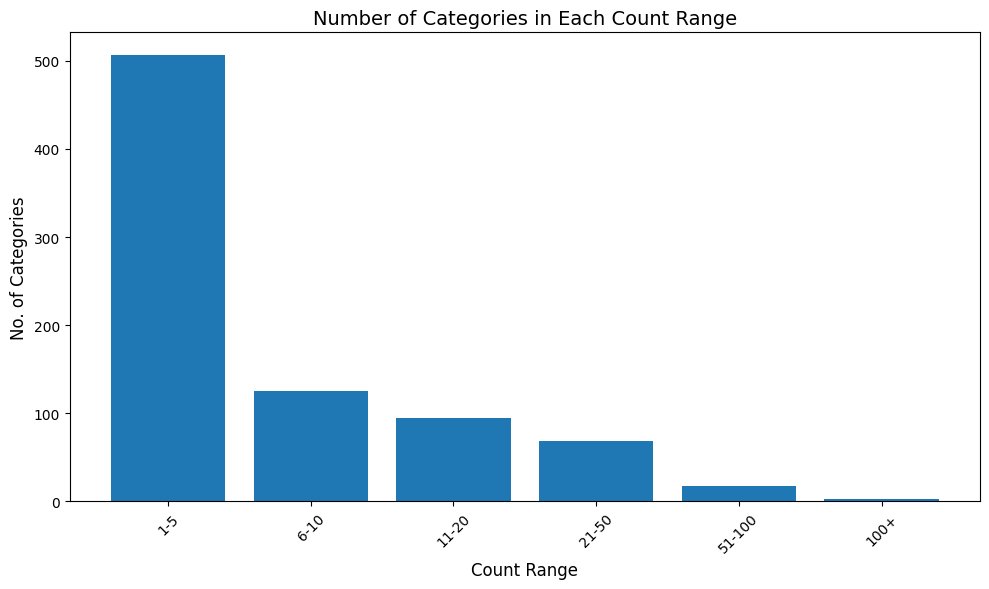

In [27]:
# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['range'], df_grouped['category'])
plt.xlabel('Count Range', fontsize=12)
plt.ylabel('No. of Categories', fontsize=12)
plt.title('Number of Categories in Each Count Range', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

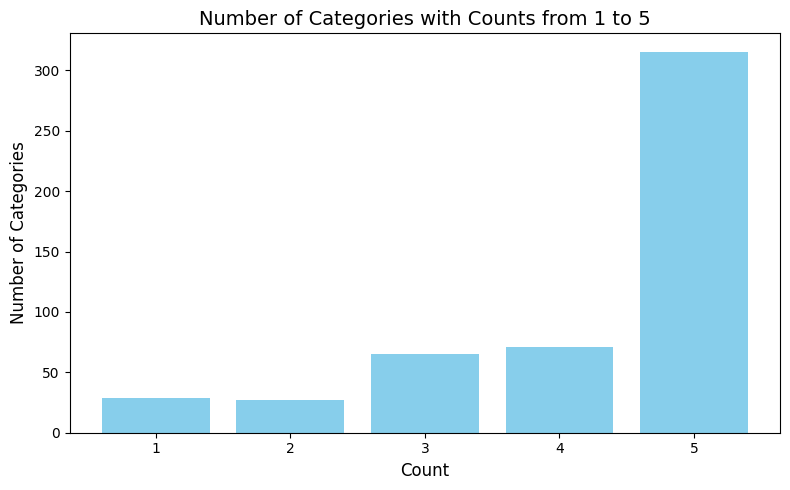

In [28]:
# Filter for counts 1-5
df_filtered = df_sorted[df_sorted['count'].isin([1, 2, 3, 4, 5])]

# Group by 'count' and count the categories
df_grouped_filtered = df_filtered.groupby('count')['category'].count().reset_index()

# Sort by 'count' ascending
df_grouped_filtered = df_grouped_filtered.sort_values(by='count')

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(df_grouped_filtered['count'].astype(str), df_grouped_filtered['category'], color='skyblue')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Number of Categories', fontsize=12)
plt.title('Number of Categories with Counts from 1 to 5', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [29]:
# show the current directory
print(current_dir)

# Redirect to path to /Users/phongporter/Documents/GITHUB/jeopardy_clue_dataset/ not parent
os.chdir('/Users/phongporter/Documents/GITHUB/jeopardy_clue_dataset/')
cwd = os.getcwd()
print(cwd)

/Users/phongporter/Documents/GITHUB/jeopardy_clue_dataset/analysis
/Users/phongporter/Documents/GITHUB/jeopardy_clue_dataset


In [30]:
# Filter categories with count 1
df_count1 = df_sorted[df_sorted['count'] == 1]

# Get the number of categories with count 1
num_categories = df_count1['category'].nunique()
print(f"Number of categories with count 1: {num_categories}")

# Display the list of categories
df_count1 = df_count1[['category']].reset_index(drop=True)
df_count1.index += 1  # Start index at 1 for better readability
df_count1

# Export the DataFrame to a CSV file
df_count1.to_csv('./analysis/data/season/1/category/categories_with_count_1.csv', index=False)

Number of categories with count 1: 29


In [31]:
# Filter the season_1_df_category for categories present in df_count1
filtered_df = season_1_df_category[
    season_1_df_category['category'].isin(df_count1['category'])
][['category', 'comments', 'answer', 'question']]

# Display the filtered DataFrame
print(filtered_df)

# Create directory ./analysis/data/season/1/clue
os.makedirs('./analysis/data/season/1/clue', exist_ok=True)

# Export the filtered DataFrame to a CSV file
filtered_df.to_csv('./analysis/data/season/1/clue/filtered_categories_details_count_1.csv', index=False)

                category                                           comments  \
675     THE SOLAR SYSTEM                                                NaN   
1189   THE SUPREME COURT                                                NaN   
1606           NUTRITION                                                NaN   
1857         THE BIG TOP                                                NaN   
2294          FOLK MUSIC                                                NaN   
2357     STREISAND FILMS                                                NaN   
3595         THE THEATER                                                NaN   
3649             MARTYRS                                                NaN   
3900  TENNESSEE WILLIAMS                                                NaN   
4526          THE MOVIES                                                NaN   
4846         THE CABINET                                                NaN   
4901        20th CENTURY                            

In [32]:
# Just only answer and question
filtered_df[['answer', 'question']].to_csv('./analysis/data/season/1/clue/filtered_question_answer_count_1.csv', index=False)